# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output = "cities.csv"
outdir = "./dir"
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, output)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key = "936b5e99c0099ca886a821778e44a662"

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
cityinfo = []

for city in cities:
    cityurl = url + "&q=" + city

    try:
        print(city)     

        weather = requests.get(cityurl).json()
        latitude = weather["coord"]["lat"]
        maxtemp = weather['main']['temp_max']
        humid = weather['main']['humidity']
        cloud = weather['clouds']['all']
        wind = weather['wind']['speed']
        
        cityinfo.append({
            "City": city, 
            "Latitude": latitude,
            "Max Temperature": maxtemp,
            "Humidity": humid,
            "Cloud Information": cloud,
            "Wind Speed": wind,
             })
        
    except: 
        print("SKIPPING") 
        pass 


cityinfo

holme
noumea
hermanus
wanaka
vaitupu
SKIPPING
shitanjing
ushuaia
upernavik
barrow
pisco
saint anthony
avarua
bluff
cabo san lucas
monrovia
grindavik
nizhneyansk
SKIPPING
albany
illoqqortoormiut
SKIPPING
khani
amahai
mataura
taolanaro
SKIPPING
hobart
clyde river
callaguip
cockburn town
arraial do cabo
tasiilaq
georgetown
rikitea
ilulissat
ketchikan
busselton
port hardy
coquimbo
attawapiskat
SKIPPING
jamestown
paucartambo
SKIPPING
apple valley
santa barbara
samarai
tamsweg
mahebourg
hithadhoo
puerto ayora
yellowknife
garissa
fairbanks
tubruq
SKIPPING
tura
chuy
vaini
sunyani
altamira
kapaa
lebyazhye
palmer
kununurra
los algarrobos
umzimvubu
SKIPPING
new norfolk
ancud
saint-pierre
punta arenas
katsuura
lodwar
ust-kamchatsk
SKIPPING
dikson
valdivia
torbay
jawhar
atuona
saint-philippe
kopychyntsi
hienghene
vestmannaeyjar
namibe
belushya guba
SKIPPING
mutare
barentsburg
SKIPPING
vitim
mount isa
port lincoln
isangel
dali
bathsheba
ribeira grande
semey
libertador general san martin
camacupa
nik

[{'City': 'holme',
  'Latitude': 56.11,
  'Max Temperature': 39.2,
  'Humidity': 93,
  'Cloud Information': 16,
  'Wind Speed': 4.7},
 {'City': 'noumea',
  'Latitude': -22.28,
  'Max Temperature': 82.99,
  'Humidity': 69,
  'Cloud Information': 100,
  'Wind Speed': 3.36},
 {'City': 'hermanus',
  'Latitude': -34.42,
  'Max Temperature': 68,
  'Humidity': 86,
  'Cloud Information': 0,
  'Wind Speed': 8.9},
 {'City': 'wanaka',
  'Latitude': -44.7,
  'Max Temperature': 66.99,
  'Humidity': 40,
  'Cloud Information': 100,
  'Wind Speed': 5.99},
 {'City': 'shitanjing',
  'Latitude': 39.23,
  'Max Temperature': 25,
  'Humidity': 50,
  'Cloud Information': 33,
  'Wind Speed': 4},
 {'City': 'ushuaia',
  'Latitude': -54.8,
  'Max Temperature': 51.8,
  'Humidity': 76,
  'Cloud Information': 90,
  'Wind Speed': 11.41},
 {'City': 'upernavik',
  'Latitude': 72.79,
  'Max Temperature': -9.36,
  'Humidity': 84,
  'Cloud Information': 0,
  'Wind Speed': 10.07},
 {'City': 'barrow',
  'Latitude': 71.29,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
df = pd.DataFrame(cityinfo)

City = df['City']
Latitude = df['Latitude']
Max_Temperature = df['Max Temperature']
Humidity = df['Humidity']
Cloudiness = df['Cloud Information']
Windiness = df['Wind Speed']

df.head()


,City,Latitude,Max Temperature,Humidity,Cloud Information,Wind Speed
0,holme,56.11,39.20,93,16,4.70
1,noumea,-22.28,82.99,69,100,3.36
2,hermanus,-34.42,68.00,86,0,8.90
3,wanaka,-44.70,66.99,40,100,5.99
4,shitanjing,39.23,25.00,50,33,4.00


In [59]:
df.to_csv(output, index_label = 'CityID')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

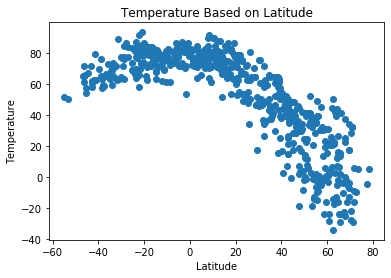

In [62]:
plt.scatter(
    Latitude, 
    Max_Temperature,
    marker = "o",    
    )
plt.title("Temperature Based on Latitude")
plt.ylabel("Temperature")
plt.xlabel("Latitude")

plt.savefig("dir/temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

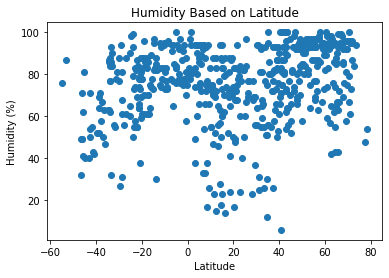

In [63]:
plt.scatter(
    Latitude, 
    Humidity,
    marker = "o",    
    )
plt.title("Humidity Based on Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("dir/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

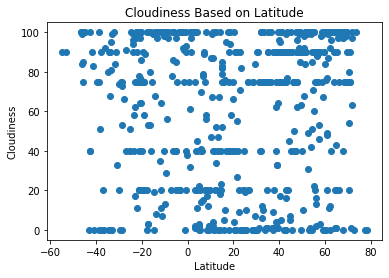

In [64]:
plt.scatter(
    Latitude, 
    Cloudiness,
    marker = "o",    
    )
plt.title("Cloudiness Based on Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig("dir/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

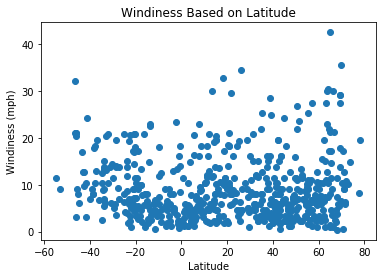

In [65]:
plt.scatter(
    Latitude, 
    Windiness,
    marker = "o",    
    )
plt.title("Windiness Based on Latitude")
plt.ylabel("Windiness (mph)")
plt.xlabel("Latitude")

plt.savefig("dir/Windiness.png")
plt.show()